In [119]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

In [120]:
df=pd.read_excel('Experiment Data Sheet 1.xlsx')
df.columns

Index(['ResponseId', 'DistributionChannel', 'Consent', 'Law student',
       'Attention check (1)', 'T1: Credibility (1)', 'T1: Credibility (2)',
       'T1: Credibility (3)', 'T1: Optional', 'T1: Manipulation (1)',
       'T1: Manipulation (1)_6_TEXT', 'T1: Manipulation (2)',
       'T1: Manipulation (2)_6_TEXT', 'Attention check (2)',
       'T2: Credibility (1)', 'T2: Credibility (2)', 'T2: Credibility (3)',
       'T2: Optional', 'T2: Manipulation (1)', 'T2: Manipulation (1)_6_TEXT',
       'T2: Manipulation (2)', 'T2: Manipulation (2)_6_TEXT',
       'Attention check (3)', 'T3: Credibility (1)', 'T3: Credibility (2)',
       'T3: Credibility (3)', 'T3: Optional', 'T3: Manipulation (1)',
       'T3: Manipulation (1)_6_TEXT', 'T3: Manipulation (2)',
       'T3: Manipulation (2)_6_TEXT', 'Attention check (4)',
       'T4: Credibility (1)', 'T4: Credibility (2)', 'T4: Credibility (3)',
       'T4: Optional', 'T4: Manipulation (1)', 'T4: Manipulation (1)_6_TEXT',
       'T4: Manipulati

In [121]:
columns_to_delete = ['ResponseId','DistributionChannel']
df = df.drop(columns=columns_to_delete)

In [122]:
df=df[(df['Consent'] =='I consent')]

In [123]:
df.Consent.value_counts()

I consent    464
Name: Consent, dtype: int64

In [124]:
# Excluding responses that failed the Attention check
df = df[
    (df['Attention check (1)'] == 'Strongly disagree') |
    (df['Attention check (2)'] == 'Strongly disagree') |
    (df['Attention check (3)'] == 'Strongly disagree') |
    (df['Attention check (4)'] == 'Strongly disagree')
]

In [125]:
df.shape

(296, 46)

In [126]:
df

,Consent,Law student,Attention check (1),T1: Credibility (1),T1: Credibility (2),T1: Credibility (3),T1: Optional,T1: Manipulation (1),T1: Manipulation (1)_6_TEXT,T1: Manipulation (2),T1: Manipulation (2)_6_TEXT,Attention check (2),T2: Credibility (1),T2: Credibility (2),T2: Credibility (3),T2: Optional,T2: Manipulation (1),T2: Manipulation (1)_6_TEXT,T2: Manipulation (2),T2: Manipulation (2)_6_TEXT,Attention check (3),T3: Credibility (1),T3: Credibility (2),T3: Credibility (3),T3: Optional,T3: Manipulation (1),T3: Manipulation (1)_6_TEXT,T3: Manipulation (2),T3: Manipulation (2)_6_TEXT,Attention check (4),T4: Credibility (1),T4: Credibility (2),T4: Credibility (3),T4: Optional,T4: Manipulation (1),T4: Manipulation (1)_6_TEXT,T4: Manipulation (2),T4: Manipulation (2)_6_TEXT,School,School_7_TEXT,Immigration/Refugee,Immigration/Refugee_8_TEXT,Gender,Gender_6_TEXT,LGBT+,LGBT+_4_TEXT
1,I consent,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Strongly disagree,Somewhat likely,No,Yes,I donâ€™t see any reason to disbelieve the app...,When they were six years old,NaN,No,NaN,Other (please specify),"Exchange student, one semester.",I do not have any personal experience with imm...,NaN,Woman,NaN,No,NaN
2,I consent,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Strongly disagree,Somewhat likely,No,Yes,The applicant states that they have no future ...,Six months before leaving Malaysia,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other (please specify),3.5 years,My parents or grandparents are immigrants,NaN,Woman,NaN,Unsure,NaN
3,I consent,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Strongly disagree,Somewhat likely,Yes,No,It sounds weird that the applicant started â€œ...,Six months before leaving Malaysia,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5+ years,NaN,My parents or grandparents are immigrants,NaN,Woman,NaN,No,NaN
4,I consent,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Strongly disagree,Somewhat likely,No,Yes,Theres not much information or even enough inf...,When they were six years old,NaN,No,NaN,5+ years,NaN,I do not have any personal experience with imm...,NaN,Man,NaN,No,NaN
5,I consent,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Strongly disagree,Very likely,Yes,No,"First off, the idea that none of the applicant...",Six months before leaving Malaysia,NaN,Other (please specify),"No, because no doctor would give it (only blac...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4 years,NaN,I do not have any personal experience with imm...,NaN,Man,NaN,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491,I consent,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Strongly disagree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
495,I consent,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Strongly disagree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
496,I consent,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Strongly disagree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
499,I consent,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Strongly disagree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [127]:
# Identify credibility columns
credibility_cols = ['T1: Credibility (1)', 'T2: Credibility (1)', 'T3: Credibility (1)', 'T4: Credibility (1)']

# Identify the source of each row while keeping the original index
df['Source'] = df[credibility_cols].apply(lambda x: x.first_valid_index(), axis=1)
df['Source'] = df['Source'].str.split(':').str[0]  # Extract T1, T2, T3, or T4

# Merge credibility columns into a single column
df['Credibility (1)'] = df[credibility_cols].bfill(axis=1).iloc[:, 0]

# Drop original T1-T4 Credibility (1) columns
df.drop(columns=credibility_cols, inplace=True)

# Merge all other prefixed columns
for col in df.columns:
    if col.startswith(('T1:', 'T2:', 'T3:', 'T4:')):  
        base_col = col.split(': ')[1]  # Extract column name after prefix
        if base_col not in df.columns:
            df[base_col] = df.filter(like=base_col).bfill(axis=1).iloc[:, 0]

# Drop original prefixed columns
df = df.loc[:, ~df.columns.str.startswith(('T1:', 'T2:', 'T3:', 'T4:'))]

In [128]:
# Merge Attention check columns into a single column
attention_cols = ['Attention check (1)', 'Attention check (2)', 'Attention check (3)', 'Attention check (4)']
df['Attention check'] = df[attention_cols].bfill(axis=1).iloc[:, 0]

# Drop the original Attention check columns
df.drop(columns=attention_cols, inplace=True)

C:\Users\dxg117\AppData\Local\Temp\ipykernel_4412\3468609353.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Attention check'] = df[attention_cols].bfill(axis=1).iloc[:, 0]
C:\Users\dxg117\AppData\Local\Temp\ipykernel_4412\3468609353.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=attention_cols, inplace=True)


In [129]:
df.shape

(296, 20)

In [130]:
df = df[df['Credibility (1)'].notna()]

In [131]:
df.head(5)

,Consent,Law student,School,School_7_TEXT,Immigration/Refugee,Immigration/Refugee_8_TEXT,Gender,Gender_6_TEXT,LGBT+,LGBT+_4_TEXT,Source,Credibility (1),Credibility (2),Credibility (3),Optional,Manipulation (1),Manipulation (1)_6_TEXT,Manipulation (2),Manipulation (2)_6_TEXT,Attention check
1,I consent,Yes,Other (please specify),"Exchange student, one semester.",I do not have any personal experience with imm...,NaN,Woman,NaN,No,NaN,T4,Somewhat likely,No,Yes,I donâ€™t see any reason to disbelieve the app...,When they were six years old,NaN,No,NaN,Strongly disagree
2,I consent,Yes,Other (please specify),3.5 years,My parents or grandparents are immigrants,NaN,Woman,NaN,Unsure,NaN,T3,Somewhat likely,No,Yes,The applicant states that they have no future ...,Six months before leaving Malaysia,NaN,Yes,NaN,Strongly disagree
3,I consent,Yes,5+ years,NaN,My parents or grandparents are immigrants,NaN,Woman,NaN,No,NaN,T2,Somewhat likely,Yes,No,It sounds weird that the applicant started â€œ...,Six months before leaving Malaysia,NaN,No,NaN,Strongly disagree
4,I consent,Yes,5+ years,NaN,I do not have any personal experience with imm...,NaN,Man,NaN,No,NaN,T4,Somewhat likely,No,Yes,Theres not much information or even enough inf...,When they were six years old,NaN,No,NaN,Strongly disagree
5,I consent,Yes,4 years,NaN,I do not have any personal experience with imm...,NaN,Man,NaN,No,NaN,T2,Very likely,Yes,No,"First off, the idea that none of the applicant...",Six months before leaving Malaysia,NaN,Other (please specify),"No, because no doctor would give it (only blac...",Strongly disagree


In [132]:
df['Credibility (1)'].value_counts()

Somewhat likely                112
Somewhat unlikely               61
Neither likely nor unlikely     38
Very likely                     31
Very unlikely                    9
Name: Credibility (1), dtype: int64

In [133]:
df['Immigration/Refugee'].value_counts() #Exclude - too few 

I do not have any personal experience with immigration or the asylum system                                              173
My parents or grandparents are immigrants                                                                                 27
Other (please specify)                                                                                                    11
My parents or grandparents are refugees                                                                                    8
Prefer not to say                                                                                                          7
I do not have any personal experience with immigration or the asylum system,My parents or grandparents are immigrants      4
I am an immigrant                                                                                                          3
I do not have any personal experience with immigration or the asylum system,Other (please specify)                         2


In [134]:
df['LGBT+'].value_counts() #combine yes, unsure = 1, rest as = 0

No                        206
Yes                        19
Unsure                      7
Other (please specify)      6
Prefer not to say           2
Name: LGBT+, dtype: int64

In [135]:
maybe = df[(df['LGBT+'] == 'Other (please specify)')]

In [136]:
maybe

,Consent,Law student,School,School_7_TEXT,Immigration/Refugee,Immigration/Refugee_8_TEXT,Gender,Gender_6_TEXT,LGBT+,LGBT+_4_TEXT,Source,Credibility (1),Credibility (2),Credibility (3),Optional,Manipulation (1),Manipulation (1)_6_TEXT,Manipulation (2),Manipulation (2)_6_TEXT,Attention check
36,I consent,Yes,Other (please specify),2 1/2 years,I do not have any personal experience with imm...,NaN,Woman,NaN,Other (please specify),Iâ€™m a cis white female,T1,Somewhat unlikely,No,No,No imminent threat. No experienced harassment....,Other (please specify),Always felt like a girl,Yes,NaN,Strongly disagree
181,I consent,Yes,3 years,NaN,I do not have any personal experience with imm...,NaN,Man,NaN,Other (please specify),"I am not a part of the alphabet mafia, but I s...",T1,Neither likely nor unlikely,Yes,No,NaN,When they were twelve years old,NaN,Yes,NaN,Strongly disagree
242,I consent,Yes,4 years,NaN,I do not have any personal experience with imm...,NaN,Woman,NaN,Other (please specify),No but I support 100%,T2,Somewhat unlikely,Yes,No,As the person is not legally or- appearance wi...,Six months before leaving Malaysia,NaN,No,NaN,Strongly disagree
251,I consent,Yes,3 years,NaN,I do not have any personal experience with imm...,NaN,Woman,NaN,Other (please specify),"I support LGBT+ rights, but I am not actively ...",T3,Very unlikely,No,No,I don't think the applicant has constructed th...,Six months before leaving Malaysia,NaN,Yes,NaN,Strongly disagree
265,I consent,Yes,2 years,NaN,I do not have any personal experience with imm...,NaN,Man,NaN,Other (please specify),"Yes, but to a certain degree. Everyone should ...",T1,Somewhat unlikely,Yes,No,The facts that the applicant provides are some...,When they were six years old,NaN,Yes,NaN,Strongly disagree
331,I consent,Yes,3 years,NaN,I do not have any personal experience with imm...,NaN,Woman,NaN,Other (please specify),0.1,T2,Neither likely nor unlikely,No,No,I do not believe that the story is constructed...,Six months before leaving Malaysia,NaN,No,NaN,Strongly disagree


In [137]:
print(maybe['LGBT+_4_TEXT'][181])

I am not a part of the alphabet mafia, but I support the gay community in the sense, that whatever sexuality a person might have, no persons should be prosecuted nor dicriminated upon because of their sexuality.


In [138]:
df['LGBT'] = df['LGBT+'].map({'No': 0, 'Yes': 1, 'Unsure': 1, 'Other (please specify)': 0, 'Prefer not to say' :0})

In [139]:
df.head()

,Consent,Law student,School,School_7_TEXT,Immigration/Refugee,Immigration/Refugee_8_TEXT,Gender,Gender_6_TEXT,LGBT+,LGBT+_4_TEXT,Source,Credibility (1),Credibility (2),Credibility (3),Optional,Manipulation (1),Manipulation (1)_6_TEXT,Manipulation (2),Manipulation (2)_6_TEXT,Attention check,LGBT
1,I consent,Yes,Other (please specify),"Exchange student, one semester.",I do not have any personal experience with imm...,NaN,Woman,NaN,No,NaN,T4,Somewhat likely,No,Yes,I donâ€™t see any reason to disbelieve the app...,When they were six years old,NaN,No,NaN,Strongly disagree,0.0
2,I consent,Yes,Other (please specify),3.5 years,My parents or grandparents are immigrants,NaN,Woman,NaN,Unsure,NaN,T3,Somewhat likely,No,Yes,The applicant states that they have no future ...,Six months before leaving Malaysia,NaN,Yes,NaN,Strongly disagree,1.0
3,I consent,Yes,5+ years,NaN,My parents or grandparents are immigrants,NaN,Woman,NaN,No,NaN,T2,Somewhat likely,Yes,No,It sounds weird that the applicant started â€œ...,Six months before leaving Malaysia,NaN,No,NaN,Strongly disagree,0.0
4,I consent,Yes,5+ years,NaN,I do not have any personal experience with imm...,NaN,Man,NaN,No,NaN,T4,Somewhat likely,No,Yes,Theres not much information or even enough inf...,When they were six years old,NaN,No,NaN,Strongly disagree,0.0
5,I consent,Yes,4 years,NaN,I do not have any personal experience with imm...,NaN,Man,NaN,No,NaN,T2,Very likely,Yes,No,"First off, the idea that none of the applicant...",Six months before leaving Malaysia,NaN,Other (please specify),"No, because no doctor would give it (only blac...",Strongly disagree,0.0


In [140]:
df['Law student'].value_counts()

Yes    251
Name: Law student, dtype: int64

In [141]:
df.Gender.value_counts()

Woman                     151
Man                        81
Prefer not to say           4
Non-binary                  3
Other (please specify)      1
Name: Gender, dtype: int64

In [142]:
df['Gender_6_TEXT'][479]

'Cis man'

In [143]:
df.loc[479, 'Gender'] = 'Man'

In [144]:
df.Gender.value_counts()

Woman                151
Man                   82
Prefer not to say      4
Non-binary             3
Name: Gender, dtype: int64

In [145]:
# get manipulations
# Create new columns for sunlight and water conditions
df['Time'] = df['Source'].map({'T1': 'Early', 'T2': 'Late', 'T3': 'Late', 'T4': 'Early'})
df['Medical'] = df['Source'].map({'T1': 'Meds', 'T2': 'No_Meds', 'T3': 'Meds', 'T4': 'No_Meds'})
df.head()


,Consent,Law student,School,School_7_TEXT,Immigration/Refugee,Immigration/Refugee_8_TEXT,Gender,Gender_6_TEXT,LGBT+,LGBT+_4_TEXT,Source,Credibility (1),Credibility (2),Credibility (3),Optional,Manipulation (1),Manipulation (1)_6_TEXT,Manipulation (2),Manipulation (2)_6_TEXT,Attention check,LGBT,Time,Medical
1,I consent,Yes,Other (please specify),"Exchange student, one semester.",I do not have any personal experience with imm...,NaN,Woman,NaN,No,NaN,T4,Somewhat likely,No,Yes,I donâ€™t see any reason to disbelieve the app...,When they were six years old,NaN,No,NaN,Strongly disagree,0.0,Early,No_Meds
2,I consent,Yes,Other (please specify),3.5 years,My parents or grandparents are immigrants,NaN,Woman,NaN,Unsure,NaN,T3,Somewhat likely,No,Yes,The applicant states that they have no future ...,Six months before leaving Malaysia,NaN,Yes,NaN,Strongly disagree,1.0,Late,Meds
3,I consent,Yes,5+ years,NaN,My parents or grandparents are immigrants,NaN,Woman,NaN,No,NaN,T2,Somewhat likely,Yes,No,It sounds weird that the applicant started â€œ...,Six months before leaving Malaysia,NaN,No,NaN,Strongly disagree,0.0,Late,No_Meds
4,I consent,Yes,5+ years,NaN,I do not have any personal experience with imm...,NaN,Man,NaN,No,NaN,T4,Somewhat likely,No,Yes,Theres not much information or even enough inf...,When they were six years old,NaN,No,NaN,Strongly disagree,0.0,Early,No_Meds
5,I consent,Yes,4 years,NaN,I do not have any personal experience with imm...,NaN,Man,NaN,No,NaN,T2,Very likely,Yes,No,"First off, the idea that none of the applicant...",Six months before leaving Malaysia,NaN,Other (please specify),"No, because no doctor would give it (only blac...",Strongly disagree,0.0,Late,No_Meds


In [146]:
df.columns

Index(['Consent', 'Law student', 'School', 'School_7_TEXT',
       'Immigration/Refugee', 'Immigration/Refugee_8_TEXT', 'Gender',
       'Gender_6_TEXT', 'LGBT+', 'LGBT+_4_TEXT', 'Source', 'Credibility (1)',
       'Credibility (2)', 'Credibility (3)', 'Optional', 'Manipulation (1)',
       'Manipulation (1)_6_TEXT', 'Manipulation (2)',
       'Manipulation (2)_6_TEXT', 'Attention check', 'LGBT', 'Time',
       'Medical'],
      dtype='object')

In [147]:
df = df[['Gender', 'LGBT', 'Time', 'Medical', 'Credibility (1)','Credibility (2)', 'Credibility (3)', 'Optional']]


In [148]:
df['Credibility (1)'].value_counts()

Somewhat likely                112
Somewhat unlikely               61
Neither likely nor unlikely     38
Very likely                     31
Very unlikely                    9
Name: Credibility (1), dtype: int64

In [149]:
df['Credibility (2)'].value_counts()

No     130
Yes    121
Name: Credibility (2), dtype: int64

In [150]:
df['Credibility (3)'].value_counts()

No     131
Yes    120
Name: Credibility (3), dtype: int64

In [151]:
df['Support_neg_cred'] = df['Credibility (2)'].map({'Yes': 1, 'No': 0})
df['Grant_asylum'] = df['Credibility (3)'].map({'Yes': 1, 'No': 0})

In [152]:
df.tail(20)

,Gender,LGBT,Time,Medical,Credibility (1),Credibility (2),Credibility (3),Optional,Support_neg_cred,Grant_asylum
375,Man,0.0,Late,No_Meds,Very likely,No,Yes,"First of all, sexuality isnâ€™t something you ...",0,1
376,Woman,1.0,Early,No_Meds,Somewhat likely,No,Yes,At vÃ¦re transkÃ¸nnet og minoritetsperson: Utr...,0,1
377,Man,0.0,Late,Meds,Very likely,No,Yes,It does not Seem like applicantâ€™s story has ...,0,1
434,NaN,NaN,Late,Meds,Somewhat likely,No,Yes,NaN,0,1
437,NaN,NaN,Late,Meds,Very likely,Yes,No,NaN,1,0
440,NaN,NaN,Late,Meds,Somewhat likely,No,Yes,The applicant has continued to take the estrog...,0,1
454,Woman,0.0,Late,Meds,Neither likely nor unlikely,No,Yes,The applicant is actively taking hormone pills.,0,1
456,Man,0.0,Late,No_Meds,Somewhat unlikely,Yes,No,NaN,1,0
460,Woman,0.0,Early,No_Meds,Somewhat likely,No,Yes,Â§7(1),0,1
466,Man,0.0,Late,Meds,Neither likely nor unlikely,Yes,No,He/she say he/she was never abroad but has bee...,1,0


In [153]:
df['Credibility (1)'].value_counts()

Somewhat likely                112
Somewhat unlikely               61
Neither likely nor unlikely     38
Very likely                     31
Very unlikely                    9
Name: Credibility (1), dtype: int64

In [154]:
df['Medical_intervention'] = df['Medical'].map({'Meds': 1, 'No_Meds': 0})

In [155]:
df['Time_early'] = df['Time'].map({'Early': 1, 'Late': 0})

In [156]:
df['Risk'] = df['Credibility (1)'].map({'Very likely': 4, 'Somewhat likely': 3, 'Neither likely nor unlikely': 2, 'Somewhat unlikely': 1, 'Very unlikely': 0 })

In [157]:
df['Gender_Man'] = df['Gender'].map({'Woman': 0, 'Prefer not to say': 0, 'Non-binary': 0, 'Man':1})

In [158]:
df = pd.get_dummies(df, columns=['Time'], drop_first=True)


In [159]:
df.columns

Index(['Gender', 'LGBT', 'Medical', 'Credibility (1)', 'Credibility (2)',
       'Credibility (3)', 'Optional', 'Support_neg_cred', 'Grant_asylum',
       'Medical_intervention', 'Time_early', 'Risk', 'Gender_Man',
       'Time_Late'],
      dtype='object')

In [160]:
df.head(5)

,Gender,LGBT,Medical,Credibility (1),Credibility (2),Credibility (3),Optional,Support_neg_cred,Grant_asylum,Medical_intervention,Time_early,Risk,Gender_Man,Time_Late
1,Woman,0.0,No_Meds,Somewhat likely,No,Yes,I donâ€™t see any reason to disbelieve the app...,0,1,0,1,3,0.0,0
2,Woman,1.0,Meds,Somewhat likely,No,Yes,The applicant states that they have no future ...,0,1,1,0,3,0.0,1
3,Woman,0.0,No_Meds,Somewhat likely,Yes,No,It sounds weird that the applicant started â€œ...,1,0,0,0,3,0.0,1
4,Man,0.0,No_Meds,Somewhat likely,No,Yes,Theres not much information or even enough inf...,0,1,0,1,3,1.0,0
5,Man,0.0,No_Meds,Very likely,Yes,No,"First off, the idea that none of the applicant...",1,0,0,0,4,1.0,1


In [161]:
#Asses that there is a welfounded fear of pers (credibility 1)
formula1 = "Risk ~ (Time_early * Medical_intervention) + LGBT + Gender_Man"

In [162]:
#Support statemant the person is lying (credibility 2)
formula2 = "Support_neg_cred ~ (Time_early* Medical_intervention) + LGBT+ + Gender_Man"

In [163]:
#Grant assylum (credibility 3)
formula3 = "Grant_asylum ~ (Time_early * Medical_intervention) + LGBT+ + Gender_Man"

In [164]:
#Use formulas to fit models
model1 = smf.ols(formula1, data=df).fit() #OLS as endognoeus variable is continuous 
model2 = smf.logit(formula2, data=df).fit() #Logit as endogenous variable is binary
model3 = smf.logit(formula3, data=df).fit() #Logit as endogenous variable is binary

Optimization terminated successfully.
         Current function value: 0.619652
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.617391
         Iterations 6


In [165]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                   Risk   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.082
Method:                 Least Squares   F-statistic:                     5.278
Date:                Tue, 29 Apr 2025   Prob (F-statistic):           0.000129
Time:                        09:55:15   Log-Likelihood:                -344.60
No. Observations:                 240   AIC:                             701.2
Df Residuals:                     234   BIC:                             722.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

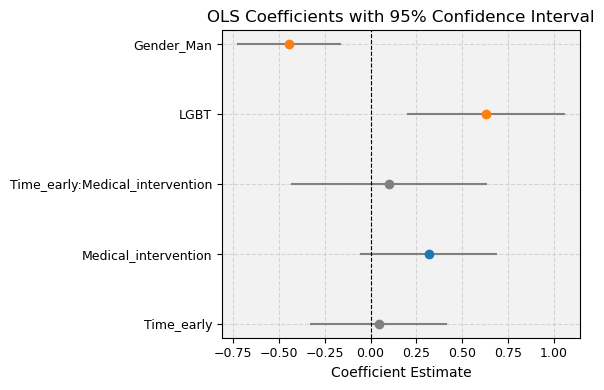

In [166]:
# Build coefficient summary
conf_int = model1.conf_int()
coef_df = pd.DataFrame({
    'predictor': model1.params.index,
    'coef': model1.params.values,
    'lower': conf_int[0].values,
    'upper': conf_int[1].values,
    'pval': model1.pvalues.values
})

# Optional: remove Intercept
coef_df = coef_df[coef_df['predictor'] != 'Intercept']

# Map p-values to significance categories
def pval_to_label(p):
    if p <= 0.001:
        return 'highly significant'
    elif p <= 0.05:
        return 'significant'
    elif p <= 0.1:
        return 'borderline significant'
    else:
        return 'not significant'

coef_df['significance'] = coef_df['pval'].apply(pval_to_label)

# Assign colors
color_map = {
    'highly significant': 'tab:red',
    'significant': 'tab:orange',
    'borderline significant': 'tab:blue',
    'not significant': 'gray'
}
coef_df['color'] = coef_df['significance'].map(color_map)

# Plot
fig, ax = plt.subplots(figsize=(6, 4))

# Error bars and points
for i, row in coef_df.iterrows():
    ax.plot([row['lower'], row['upper']], [row['predictor'], row['predictor']],
            color='gray', zorder=1)
    ax.plot(row['coef'], row['predictor'], 'o', color=row['color'], markersize=6, zorder=2)

# Styling to match bar chart
ax.axvline(0, color='black', linestyle='--', linewidth=0.8)
ax.set_axisbelow(True)
ax.yaxis.grid(color='lightgrey', linestyle='dashed')
ax.xaxis.grid(color='lightgrey', linestyle='dashed')
ax.set_facecolor('#F2F2F2')
ax.set_title('OLS Coefficients with 95% Confidence Interval', fontsize=12)
ax.set_xlabel("Coefficient Estimate", fontsize=10)
ax.set_ylabel("")  # Y-label is often unnecessary for coefficient names
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

plt.tight_layout()
plt.savefig('ols_coefficients_colored.png', dpi=600)
plt.show()


In [167]:
# Interpretation of OLS results
# Only medical internvation has a boderline significant effect on the likelyhood of danger 
# Time_early has no effect. Hence, when you came out has no isolated effect on being in danger, but the visibility in terms of 
# medical intervention has. Both LGBT and gender variables have large and significant point estimates, emplying that background-
#characteristics affect how respondens asses likelihood of danger. LGBT personens are significantly more likely to asses danger 
# of more than 63 pct. points compared to non-LGBT persons. Men are approx 45 pct. point less likey to asses danger. 


In [168]:
print(model2.summary())

                           Logit Regression Results                           
Dep. Variable:       Support_neg_cred   No. Observations:                  240
Model:                          Logit   Df Residuals:                      234
Method:                           MLE   Df Model:                            5
Date:                Tue, 29 Apr 2025   Pseudo R-squ.:                  0.1049
Time:                        09:55:23   Log-Likelihood:                -148.72
converged:                       True   LL-Null:                       -166.15
Covariance Type:            nonrobust   LLR p-value:                 1.604e-06
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           0.4263      0.281      1.516      0.130      -0.125       0.978
Time_early                         -0.4831      0.392     -1.233    

In [169]:
#Interpretation of parameterresultats

# Intercept (-.0.05): Baseline log-odds of the outcome when all predictors are 0.

# Time-early(-0.48): Time early equal to 1 decrease the log-ods of the outcome by 0.48. This would imply that the isolated effect
# of time early on being found non-credible is negative. I.e. the earlier you came out the more credible you are. 
# The parameter is however insignificant. Therefore we cannot rule out that the true effect on the log-ods is actually 0. 

# Medical intervention (-0.99): Medical intervention equal to 1 decrease the log-odds of the outcome by 0.99. This would imply
# that the isolated effect of taking medicin on being found non-credible is negative. I.e. if you take medicin you are more likely
# to be assesed as credible. 
# The parameter is significant on a 1 pct. level. 

# Time_early:Medical_Intervention (0.666): The interaction between time late and medicin has a positive parameter sign compared to
# medical intervention alone. This would imply that the combination of being early to coming out and taking medicin decreases 
# the likelihood of being found non-credible even further. Consistent with rational choice theory? 
# The parameter is however insignificant. Therefore we cannot rule out that the true effect of the interaction on the log-ods is actually 0.

#LGBT (-2.58): LGBT = 1 decreases log-odds of the outcome by -2.58. The parameter estimate is highly significant on a 1 pct. level
# indicating that LGBT-persons are less like to asses non-credible. 

# Gender_Man (0.72): Being a man increases log-odds of the outcome by 0.72. The parameter estimate is highly significant on a 1 pct. level
# indicating that men are morely likely to asses non-credible. 


In [ ]:
#Log odds cannot directly be interpreted into pct. changes etc. Therefore we construct ods-ratios. 
# Odds ratio > 1: increased odds of the outcome
#Odds ratio < 1: decreased odds
#Odds ratio ≈ 1: no effec

In [170]:
odds_ratios2 = np.exp(model2.params) #Odds ratio
conf_int = model2.conf_int() #Confidence intervals 
conf_int_odds = np.exp(conf_int)
conf_int.columns = ['2.5%', '97.5%']
conf_int_odds = np.exp(conf_int)

# Combine with odds ratios into a single DataFrame for nice display
odds_ratios_summary2 = pd.concat([odds_ratios2, conf_int_odds], axis=1)
odds_ratios_summary2.columns = ['Odds Ratio', '2.5%', '97.5%']
odds_ratios_summary2['pvalues'] = model2.pvalues
odds_ratios_summary2['significance level'] = [
    'highly significant' if pval <= 0.001 else
    'significant' if pval <= 0.05 else
    'borderline significant' if pval <= 0.1 else
    'not significant'
    for pval in model2.pvalues
]
odds_ratios_summary2

,Odds Ratio,2.5%,97.5%,pvalues,significance level
Intercept,1.531544,0.882532,2.657836,0.129606,not significant
Time_early,0.616876,0.286275,1.329266,0.217458,not significant
Medical_intervention,0.370342,0.172084,0.797017,0.011081,significant
Time_early:Medical_intervention,1.935689,0.652023,5.746564,0.234191,not significant
LGBT,0.075225,0.016941,0.334034,0.000670,highly significant
Gender_Man,2.063766,1.156721,3.682072,0.014173,significant


In [172]:
# Interpretation of odds-ratio 

# Time_early decreases likelihood of being assesed non-credible by (1-0.62=38 pct. compared to persons who were not late. 
#However, it cannot be ruled out that the odds-ration is  actual 1, 
#i.e. that there is no difference between non time late and time late persons. Hence, there appear to be no effect.

# Medical_intervention decrease likelihood of being assesed non-credible by 1-0.37=63 pct. compared to persons
# not on medicin. The ratio is significant. There appear to be an effect of medical intervention of credibility assesment.

# COmbination of time early and medical intervention increases likelihood of being asseed non-credible with almost 200 pct. 
#But also insigificant. 

# LGBT decreases liklihood of non credible by 1-0.08=92 pct. Significant (1 is not in the confidenceban) 
#Being LGBT thus decreases likelihood of agreeing with statement that person is lying

# Gender man increases likelihood of non creadible by more that 200 pct. compared to women. Odds ratio is significant. 

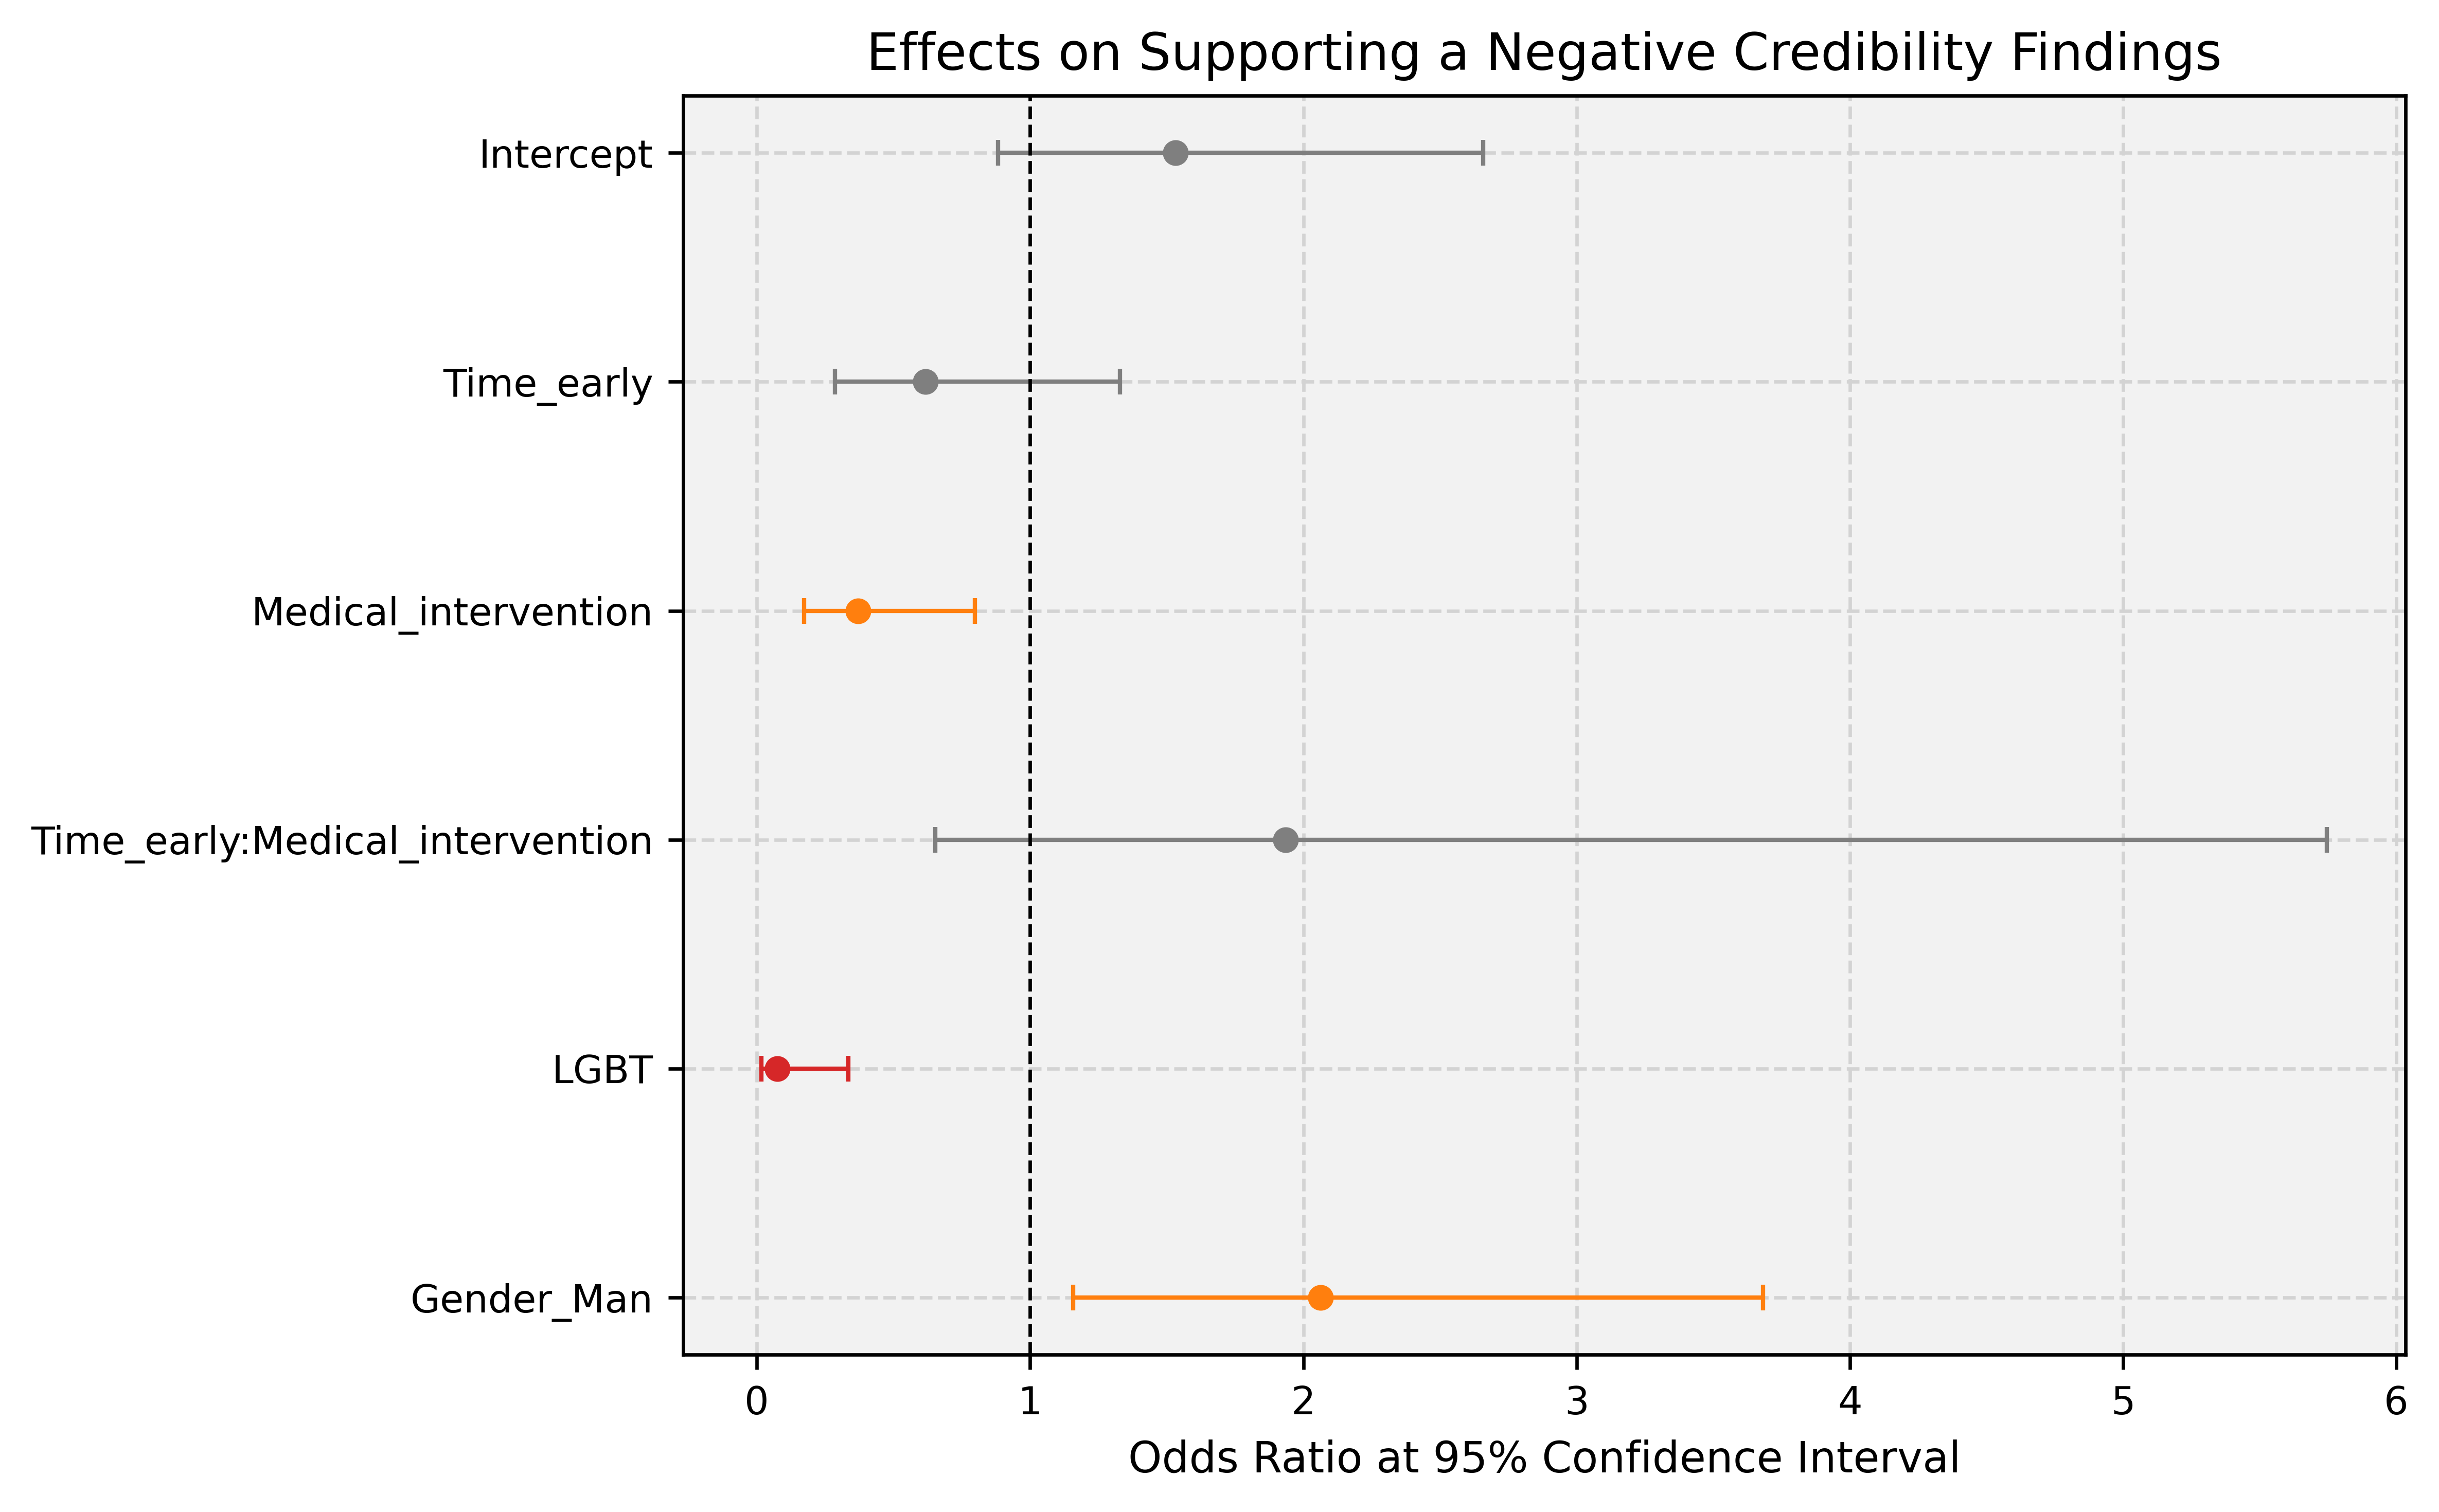

In [182]:

fig, ax = plt.subplots(nrows=1, figsize=(8, 5), dpi=600)

for idx, row in odds_ratios_summary2.iloc[::-1].iterrows():
    ci = [[row['Odds Ratio'] - row['2.5%']], [row['97.5%'] - row['Odds Ratio']]]
    
    # Choose color based on significance level
    if row['significance level'] == 'highly significant':
        color = 'tab:red'
    elif row['significance level'] == 'significant':
        color = 'tab:orange'
    elif row['significance level'] == 'borderline significant':
        color = 'tab:blue'
    else:
        color = 'tab:gray'
    
    ax.errorbar(
        x=[row['Odds Ratio']], y=[row.name], xerr=ci,
        ecolor=color, capsize=3, linestyle='None',
        linewidth=1, marker="o", markersize=5,
        mfc=color, mec=color
    )

ax.axvline(x=1, linewidth=0.8, linestyle='--', color='black')
ax.set_axisbelow(True)
ax.yaxis.grid(color='lightgrey', linestyle='dashed')
ax.xaxis.grid(color='lightgrey', linestyle='dashed')
ax.set_facecolor('#F2F2F2')
ax.set_title('Effects on Supporting a Negative Credibility Findings', fontsize=12)
ax.set_xlabel('Odds Ratio at 95% Confidence Interval', fontsize=10)

plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

plt.tight_layout()
plt.savefig('forest_plot_styled.png', dpi=600)
plt.show()


In [173]:
print(model3.summary())

                           Logit Regression Results                           
Dep. Variable:           Grant_asylum   No. Observations:                  240
Model:                          Logit   Df Residuals:                      234
Method:                           MLE   Df Model:                            5
Date:                Tue, 29 Apr 2025   Pseudo R-squ.:                  0.1077
Time:                        09:57:56   Log-Likelihood:                -148.17
converged:                       True   LL-Null:                       -166.06
Covariance Type:            nonrobust   LLR p-value:                 1.060e-06
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                          -0.4875      0.284     -1.715      0.086      -1.045       0.070
Time_early                          0.4496      0.395      1.139    

In [177]:
odds_ratios3 = np.exp(model3.params) #Odds ratio
conf_int = model3.conf_int() #Confidence intervals 
conf_int_odds = np.exp(conf_int)
conf_int.columns = ['2.5%', '97.5%']
conf_int_odds = np.exp(conf_int)

# Combine with odds ratios into a single DataFrame for nice display
odds_ratios_summary3 = pd.concat([odds_ratios3, conf_int_odds], axis=1)
odds_ratios_summary3.columns = ['Odds Ratio', '2.5%', '97.5%']
odds_ratios_summary3['pvalues'] = model3.pvalues
odds_ratios_summary3['significance level'] = [
    'highly significant' if pval <= 0.001 else
    'significant' if pval <= 0.05 else
    'borderline significant' if pval <= 0.1 else
    'not significant'
    for pval in model3.pvalues
]
odds_ratios_summary3


,Odds Ratio,2.5%,97.5%,pvalues,significance level
Intercept,0.614141,0.351837,1.071997,0.086281,borderline significant
Time_early,1.567686,0.723199,3.398289,0.254709,not significant
Medical_intervention,3.023604,1.397624,6.541231,0.004950,significant
Time_early:Medical_intervention,0.386672,0.129222,1.157041,0.089296,borderline significant
LGBT,7.146446,2.283253,22.367953,0.000730,highly significant
Gender_Man,0.369398,0.204169,0.668342,0.000995,highly significant


In [ ]:
# Same results as above. 
# However even crazyier effect of being LGBT on likelihood of granting asylum. 

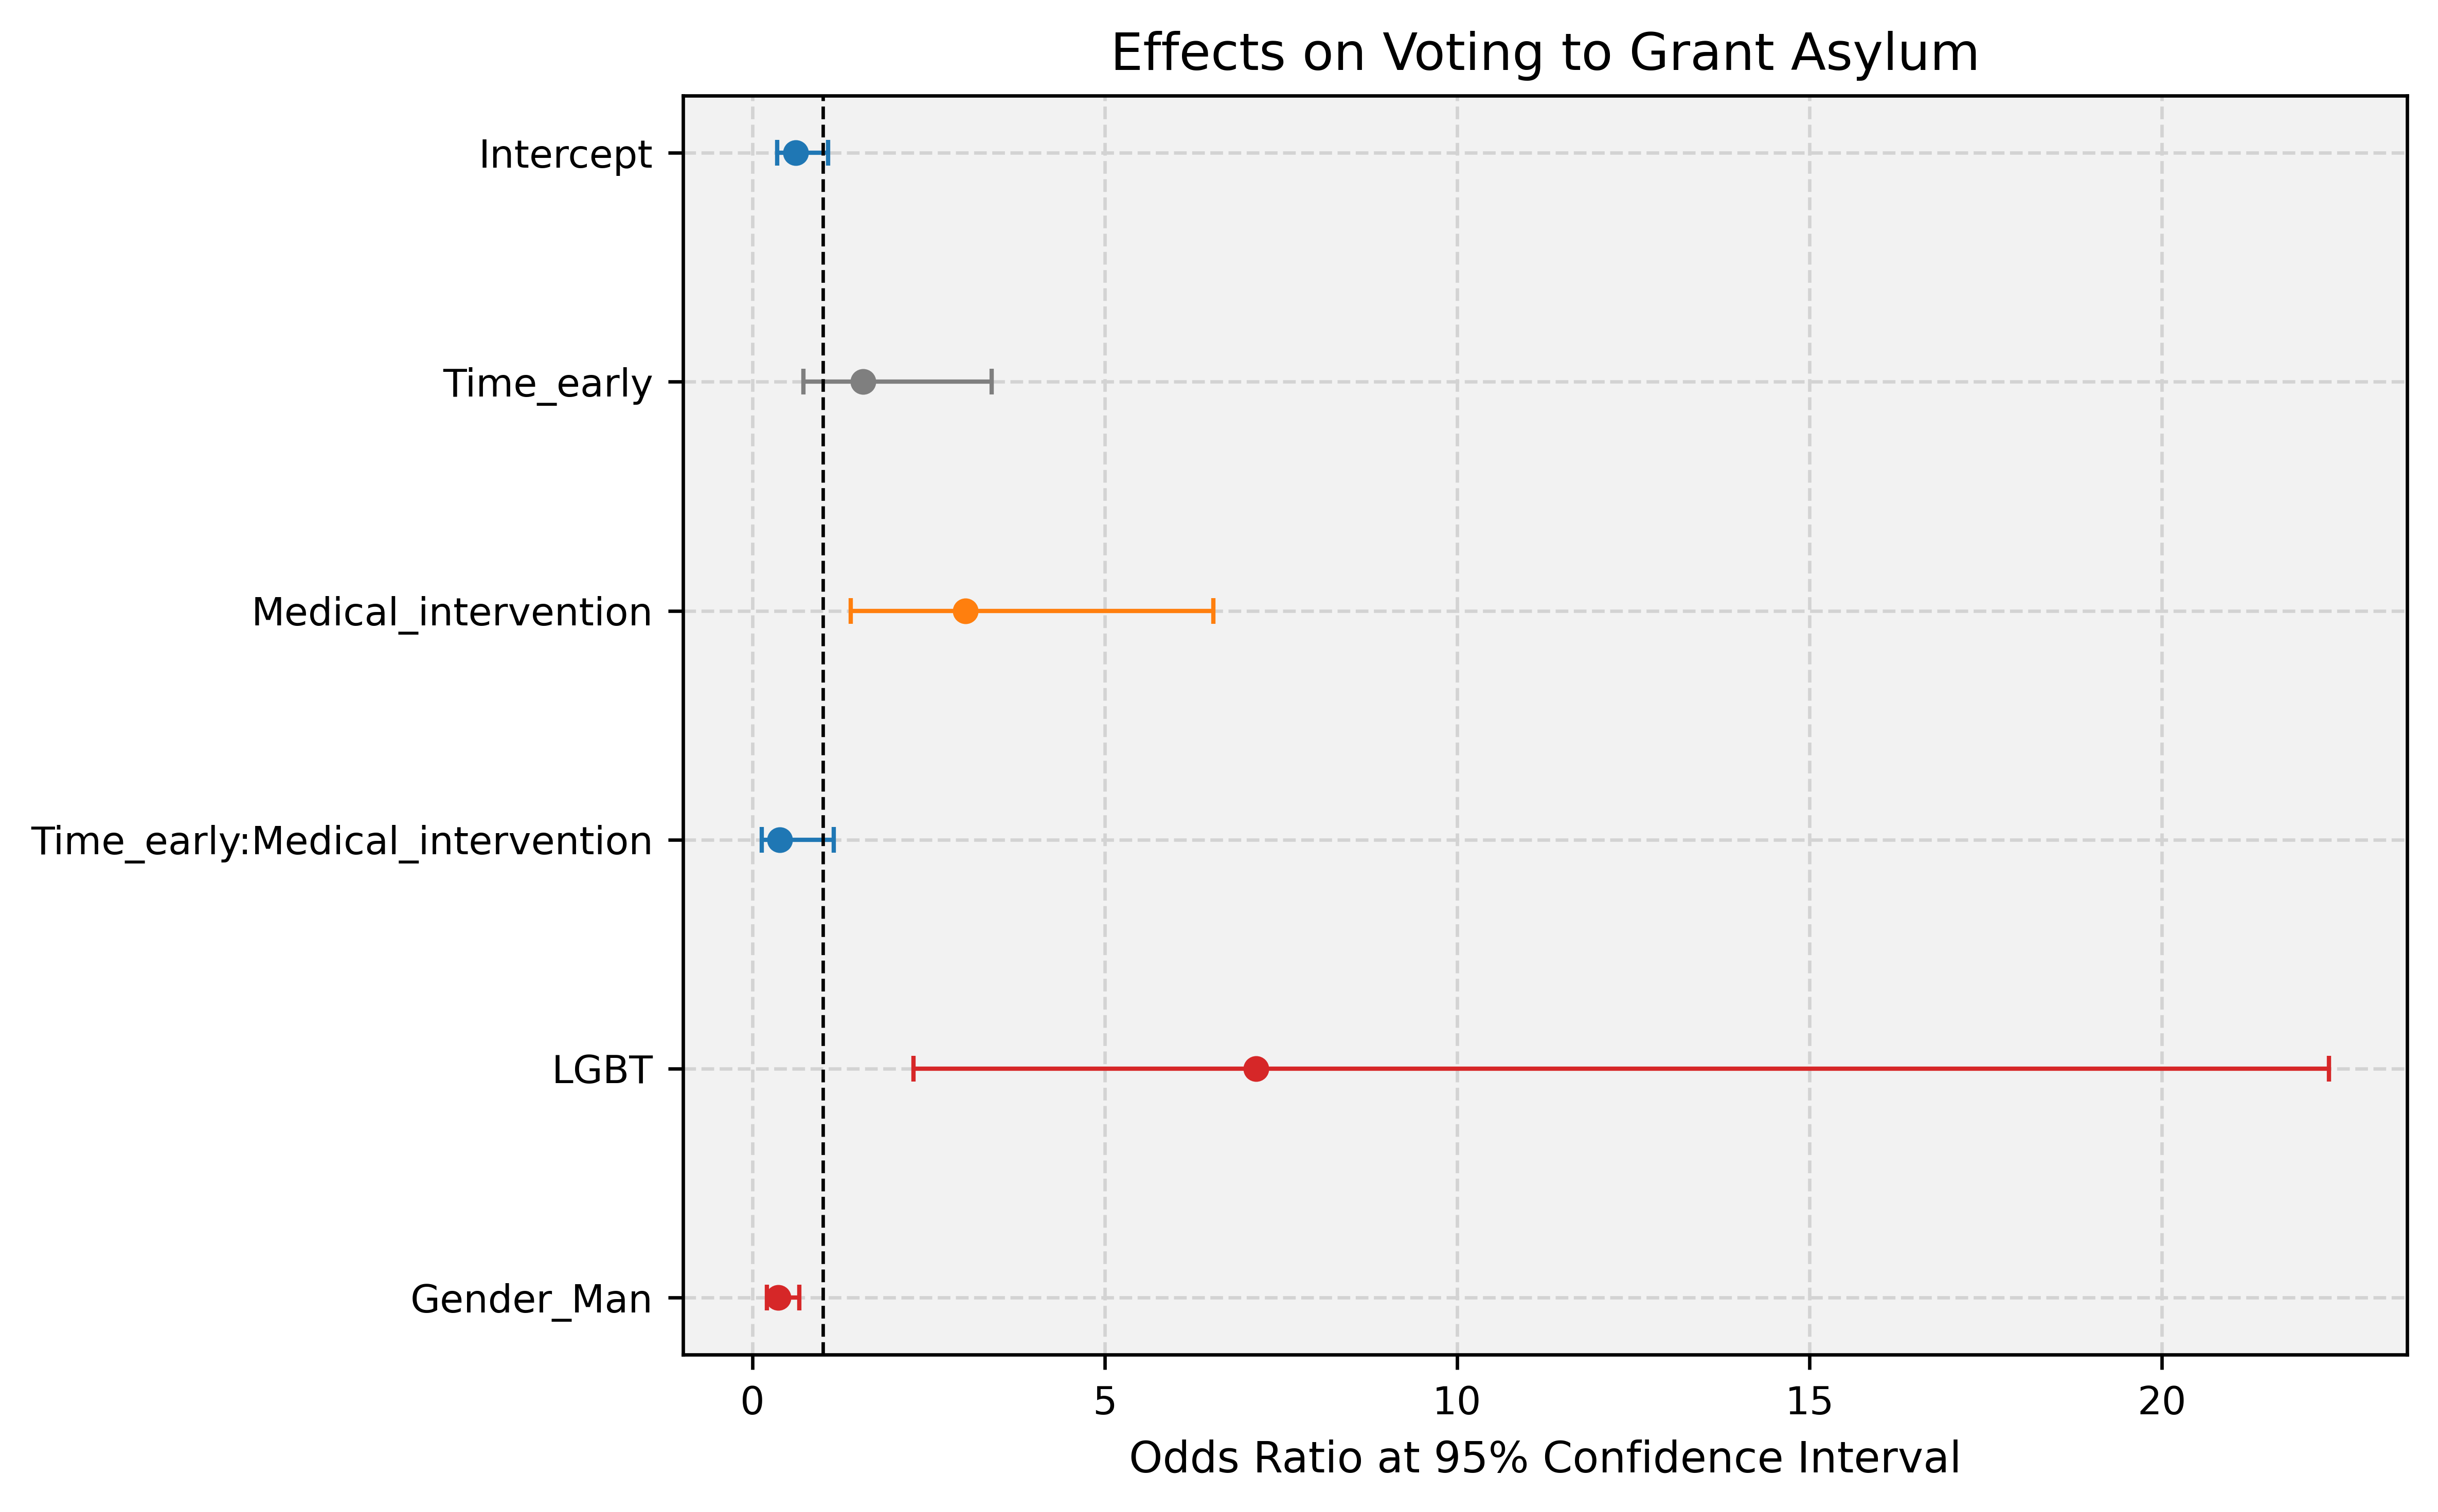

In [183]:
fig, ax = plt.subplots(nrows=1, figsize=(8, 5), dpi=600)

for idx, row in odds_ratios_summary3.iloc[::-1].iterrows():
    ci = [[row['Odds Ratio'] - row['2.5%']], [row['97.5%'] - row['Odds Ratio']]]
    
    # Choose color based on significance level
    if row['significance level'] == 'highly significant':
        color = 'tab:red'
    elif row['significance level'] == 'significant':
        color = 'tab:orange'
    elif row['significance level'] == 'borderline significant':
        color = 'tab:blue'
    else:
        color = 'tab:gray'
    
    ax.errorbar(
        x=[row['Odds Ratio']], y=[row.name], xerr=ci,
        ecolor=color, capsize=3, linestyle='None',
        linewidth=1, marker="o", markersize=5,
        mfc=color, mec=color
    )

# Styling
ax.axvline(x=1, linewidth=0.8, linestyle='--', color='black')
ax.set_axisbelow(True)
ax.yaxis.grid(color='lightgrey', linestyle='dashed')
ax.xaxis.grid(color='lightgrey', linestyle='dashed')
ax.set_facecolor('#F2F2F2')
ax.set_title('Effects on Voting to Grant Asylum', fontsize=12)
ax.set_xlabel('Odds Ratio at 95% Confidence Interval', fontsize=10)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

plt.tight_layout()
plt.savefig('forest_plot_styled.png', dpi=600)
plt.show()
